In [12]:
from sklearn import datasets
import pandas as pd

In [4]:
iris = datasets.load_iris()
dir(iris) # dir : 객체 구조

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
df = pd.DataFrame(iris.data)
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
# df.columns = ["a","b","c","d"]
df.columns = iris.feature_names
df
df2 = df[["sepal length (cm)", "sepal width (cm)"]]
df2.head()
# 1. 데이터 전처리 -> df2

# 2. 모델선택 -> 비지도학습 -> 군집 -> 3분류 -> KNN 모델
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, algorithm="auto")
model.fit(df2)
prediction = model.predict(df2) # X(독립변수), y(종속변수)
print(prediction)
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


     sepal length (cm)  sepal width (cm)  prediction
145                6.7               3.0           1
146                6.3               2.5           2
147                6.5               3.0           1
148                6.2               3.4           1
149                5.9               3.0           2


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


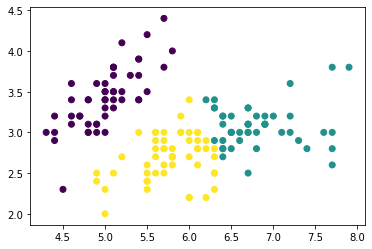

In [33]:
df2["prediction"] = prediction
print(df2.tail())
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(df2["sepal length (cm)"], df2["sepal width (cm)"], c = df2["prediction"])